# Coarsening on the ROMS C-Grid

![Coarsening ROMS Grid](https://raw.githubusercontent.com/NoraLoose/roms-utils/main/Coarsening_ROMS_grid.png)

### Reading grid information and data

In [1]:
import xarray as xr

In [2]:
# Read grid information
ds_grid = xr.open_dataset("/glade/derecho/scratch/bachman/UCLA-ROMS/Work/Iceland1/INPUT/Iceland1_grd.nc")

In [3]:
ds_grid

<xarray.Dataset> Size: 96MB
Dimensions:       (one: 1, eta_rho: 1082, xi_rho: 1082, eta_coarse: 542,
                   xi_coarse: 542)
Dimensions without coordinates: one, eta_rho, xi_rho, eta_coarse, xi_coarse
Data variables: (12/19)
    spherical     (one) |S1 1B ...
    angle         (eta_rho, xi_rho) float64 9MB ...
    h             (eta_rho, xi_rho) float64 9MB ...
    hraw          (eta_rho, xi_rho) float64 9MB ...
    f             (eta_rho, xi_rho) float64 9MB ...
    pm            (eta_rho, xi_rho) float64 9MB ...
    ...            ...
    xy_flip       (one) float64 8B ...
    lon_coarse    (eta_coarse, xi_coarse) float64 2MB ...
    lat_coarse    (eta_coarse, xi_coarse) float64 2MB ...
    angle_coarse  (eta_coarse, xi_coarse) float64 2MB ...
    h_coarse      (eta_coarse, xi_coarse) float64 2MB ...
    mask_coarse   (eta_coarse, xi_coarse) float64 2MB ...
Attributes:
    Title:    ROMS grid by Easy Grid. Settings: nx: 1080 ny: 1080 xsize: 1080...
    Date:     26-Jul-2023
    Type:     ROMS grid produced by Easy Grid

In [4]:
# Read some data
ds = xr.open_dataset("/glade/derecho/scratch/bachman/UCLA-ROMS/run/Iceland1/AVG/Iceland1_avg.20120402000000.nc")

In [5]:
ds

<xarray.Dataset> Size: 2GB
Dimensions:     (time: 1, auxil: 6, eta_rho: 1082, xi_rho: 1082, s_rho: 100,
                 xi_u: 1081, eta_v: 1081, s_w: 101)
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, s_rho, xi_u,
                                eta_v, s_w
Data variables:
    ocean_time  (time) float64 8B ...
    time_step   (time, auxil) int32 24B ...
    zeta        (time, eta_rho, xi_rho) float32 5MB ...
    u           (time, s_rho, eta_rho, xi_u) float32 468MB ...
    v           (time, s_rho, eta_v, xi_rho) float32 468MB ...
    temp        (time, s_rho, eta_rho, xi_rho) float32 468MB ...
    salt        (time, s_rho, eta_rho, xi_rho) float32 468MB ...
    Akt         (time, s_w, eta_rho, xi_rho) float32 473MB ...
Attributes: (12/35)
    title:                 Iceland1 , 1.0km resolution
    grid_file:             /glade/derecho/scratch/bachman/UCLA-ROMS/Work/Icel...
    init_file:             /glade/derecho/scratch/bachman/UCLA-ROMS/Work/Icel...
    ntimes:                1441
    ndtfast:               80
    dt:                    60.0
    ...                    ...
    SRCS:                  KRNSRC param.F dimensions.F read_write.F ocean_var...
    CPPS:                  <cppdefs.opt> TWAKE DIAGNOSTICS TIDES BULK_FRC SPO...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_EAST, OBC_NORTH, OBC_SOUTH, OBC_M3O...
    git_version:           00d09a3fbd3fa41cc50b679742b7f4b4832d5df3
    type:                  ROMS averages file

### The `ROMSCoarsener` object

In [6]:
from coarsen import ROMSCoarsener

In [7]:
# Initialize ROMSCoarsener object with horizontal grid information
%time coarsener = ROMSCoarsener(ds_grid=ds_grid)

CPU times: user 56.1 ms, sys: 43.2 ms, total: 99.4 ms
Wall time: 104 ms


The `ROMSCoarsener` object will figure out whether you give it a tracer, u- or v-field. Let's try it out!

In [9]:
%time zeta_coarsened = coarsener(ds["zeta"], factor=4)

CPU times: user 51.8 ms, sys: 7.83 ms, total: 59.6 ms
Wall time: 90.8 ms


In [10]:
zeta_coarsened

<xarray.DataArray 'zeta' (time: 1, eta_rho: 272, xi_rho: 272)> Size: 592kB
array([[[-0.04358322, -0.04036059, -0.03193796, ..., -0.0032635 ,
         -0.02088521, -0.02755058],
        [-0.04029483, -0.03675318, -0.02802471, ..., -0.01812514,
         -0.03616688, -0.04292959],
        [-0.03219181, -0.02820193, -0.01919843, ..., -0.06044206,
         -0.07746118, -0.08431857],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -1.13828033,
         -1.14527529, -1.14697535],
        [ 0.        ,  0.        ,  0.        , ..., -1.14291806,
         -1.15368321, -1.15698397],
        [ 0.        ,  0.        ,  0.        , ..., -1.14365983,
         -1.15549156, -1.1593709 ]]])
Dimensions without coordinates: time, eta_rho, xi_rho
Attributes:
    long_name:  averaged free-surface elevation
    units:      meter

The 3D fields take a little more time:

In [11]:
%time temp_coarsened = coarsener(ds["temp"], factor=4)

CPU times: user 3.42 s, sys: 1.99 s, total: 5.42 s
Wall time: 6.09 s


In [12]:
temp_coarsened

<xarray.DataArray 'temp' (time: 1, s_rho: 100, eta_rho: 272, xi_rho: 272)> Size: 59MB
array([[[[ 5.17666388,  5.24125981,  5.35419524, ...,  4.11735642,
           4.39052331,  4.59001207],
         [ 5.13317972,  5.1994397 ,  5.30079782, ...,  4.39416838,
           4.61846134,  4.76513646],
         [ 5.09568737,  5.13852112,  5.22082501, ...,  4.58658601,
           4.919817  ,  5.12134603],
         ...,
         [ 0.        ,  0.        ,  0.        , ..., -0.79617555,
          -0.79313189, -0.78764791],
         [ 0.        ,  0.        ,  0.        , ..., -0.79227145,
          -0.79167452, -0.78405909],
         [ 0.        ,  0.        ,  0.        , ..., -0.79049884,
          -0.79150608, -0.78479195]],

        [[ 5.17659855,  5.24477613,  5.35706556, ...,  4.1257714 ,
           4.40424502,  4.59950352],
         [ 5.13075559,  5.19766277,  5.30086324, ...,  4.40081344,
           4.6276338 ,  4.77332304],
         [ 5.09342062,  5.13376182,  5.21843728, ...,  4.5898186 ,
           4.92743199,  5.12839487],
...
         [ 0.        ,  0.        ,  0.        , ..., -0.14239587,
          -0.09156378, -0.05223578],
         [ 0.        ,  0.        ,  0.        , ..., -0.08742591,
           0.01733804,  0.09732632],
         [ 0.        ,  0.        ,  0.        , ..., -0.07222047,
           0.07492024,  0.13793468]],

        [[ 6.10036516,  6.12414265,  6.15228033, ...,  6.27089405,
           6.25446606,  6.2256732 ],
         [ 6.06731545,  6.0742194 ,  6.10344083, ...,  6.19198109,
           6.15577044,  6.13104683],
         [ 6.012566  ,  6.03081527,  6.06276203, ...,  5.96789988,
           5.8892344 ,  5.83592627],
         ...,
         [ 0.        ,  0.        ,  0.        , ..., -0.15061574,
          -0.09937496, -0.05564909],
         [ 0.        ,  0.        ,  0.        , ..., -0.09592571,
           0.00936029,  0.09166295],
         [ 0.        ,  0.        ,  0.        , ..., -0.08522352,
           0.06340261,  0.12926216]]]])
Dimensions without coordinates: time, s_rho, eta_rho, xi_rho
Attributes:
    long_name:  averaged potential temperature
    units:      Celsius

The above example shos that the `ROMSCoarsener` does not only work for 2D fields, but will work for fields with arbitrary dimensions (3D, 4D, ...) - it will simply coarsen over the `eta` and `xi` dimensions.

In [13]:
%time u_coarsened = coarsener(ds["u"], factor=8)

CPU times: user 4.43 s, sys: 305 ms, total: 4.73 s
Wall time: 6.62 s


In [14]:
u_coarsened

<xarray.DataArray 'u' (eta_rho: 137, xi_u: 136, s_rho: 100, time: 1)> Size: 15MB
array([[[[-4.81898859e-02],
         [-5.44604696e-02],
         [-4.70809527e-02],
         ...,
         [-1.86051607e-01],
         [-1.72795489e-01],
         [-1.72469288e-01]],

        [[-6.88269734e-02],
         [-7.90981129e-02],
         [-7.18671754e-02],
         ...,
         [-1.72573894e-01],
         [-1.59201846e-01],
         [-1.58369124e-01]],

        [[-9.09841135e-02],
         [-1.00368276e-01],
         [-1.10764563e-01],
         ...,
...
         ...,
         [-1.69359997e-01],
         [-1.68171734e-01],
         [-1.62721768e-01]],

        [[ 3.40890400e-02],
         [ 2.30883062e-02],
         [ 8.91432445e-03],
         ...,
         [-2.45768614e-02],
         [-1.01664271e-02],
         [ 9.84991342e-03]],

        [[-3.19954492e-02],
         [-3.45149152e-02],
         [-4.45649885e-02],
         ...,
         [-5.63056534e-03],
         [-2.52063037e-03],
         [ 4.79096314e-03]]]])
Dimensions without coordinates: eta_rho, xi_u, s_rho, time
Attributes:
    long_name:  averaged u-momentum component
    units:      meter second-1

In [15]:
%time v_coarsened = coarsener(ds["v"], factor=5)

CPU times: user 5.66 s, sys: 802 ms, total: 6.46 s
Wall time: 8.17 s


In [16]:
v_coarsened

<xarray.DataArray 'v' (time: 1, s_rho: 100, eta_v: 217, xi_rho: 218)> Size: 38MB
array([[[[-0.03517635, -0.01235616, -0.00752011, ..., -0.10701823,
          -0.20175693, -0.23284294],
         [-0.03859334,  0.00476228,  0.01751361, ..., -0.12184213,
          -0.16001761, -0.18592045],
         [ 0.00289867,  0.02908345,  0.04990651, ..., -0.08946302,
          -0.10741215, -0.1267529 ],
         ...,
         [ 0.        ,  0.        ,  0.        , ..., -0.10304891,
          -0.08303564, -0.1072291 ],
         [ 0.        ,  0.        ,  0.        , ..., -0.12699076,
          -0.11646903, -0.13105483],
         [ 0.        ,  0.        ,  0.        , ..., -0.13633596,
          -0.1181637 , -0.10335612]],

        [[-0.04658065, -0.01996994, -0.01397438, ..., -0.12563717,
          -0.23228129, -0.26333252],
         [-0.04965669, -0.00866311,  0.00725875, ..., -0.12985455,
          -0.17703625, -0.20426235],
         [-0.0123587 ,  0.01674192,  0.03958847, ..., -0.09195996,
          -0.11385603, -0.13302545],
...
         [ 0.        ,  0.        ,  0.        , ..., -0.1828708 ,
          -0.16625758, -0.06871578],
         [ 0.        ,  0.        ,  0.        , ..., -0.16867313,
          -0.1835529 , -0.09628528],
         [ 0.        ,  0.        ,  0.        , ..., -0.15206899,
          -0.18376182, -0.18462865]],

        [[ 0.10885269,  0.13196858,  0.16319171, ..., -0.13370356,
          -0.17623318, -0.20313305],
         [ 0.1320999 ,  0.16409681,  0.20042614, ..., -0.14459388,
          -0.17267454, -0.21459244],
         [ 0.19885284,  0.20931428,  0.22850775, ..., -0.16261584,
          -0.16315777, -0.21029454],
         ...,
         [ 0.        ,  0.        ,  0.        , ..., -0.21689407,
          -0.20090801, -0.10352331],
         [ 0.        ,  0.        ,  0.        , ..., -0.20049294,
          -0.2162238 , -0.13362904],
         [ 0.        ,  0.        ,  0.        , ..., -0.18411207,
          -0.21505264, -0.21755004]]]])
Dimensions without coordinates: time, s_rho, eta_v, xi_rho
Attributes:
    long_name:  averaged v-momentum component
    units:      meter second-1

### Some plots

In [17]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Sea surface height')

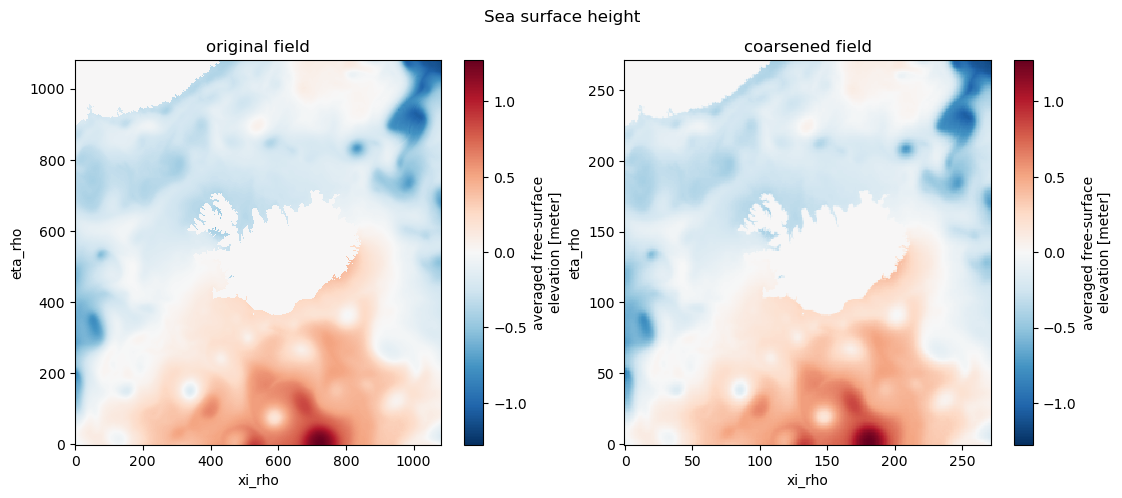

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

ds["zeta"].plot(ax=axs[0])
axs[0].set_title("original field")
zeta_coarsened.plot(ax=axs[1])
axs[1].set_title("coarsened field")

fig.suptitle("Sea surface height")

Text(0.5, 0.98, 'Surface zonal velocity')

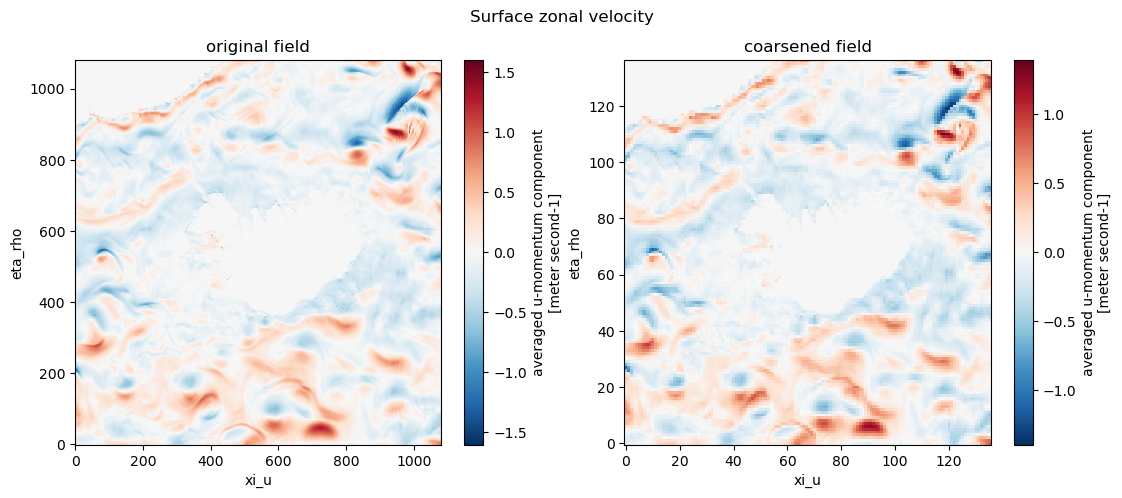

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

ds["u"].isel(s_rho=-1).plot(ax=axs[0])
axs[0].set_title("original field")
u_coarsened.isel(s_rho=-1).plot(ax=axs[1])
axs[1].set_title("coarsened field")

fig.suptitle("Surface zonal velocity")            

Text(0.5, 0.98, 'Surface meridional velocity')

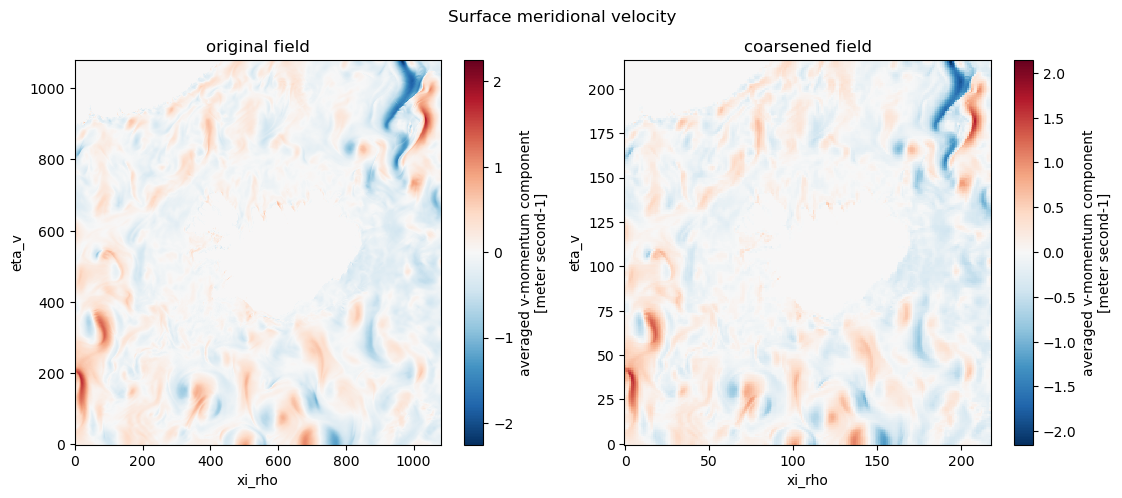

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

ds["v"].isel(s_rho=-1).plot(ax=axs[0])
axs[0].set_title("original field")
v_coarsened.isel(s_rho=-1).plot(ax=axs[1])
axs[1].set_title("coarsened field")

fig.suptitle("Surface meridional velocity")   

### Comparing the sizes of the original grid and coarsened grid
Let's have a look at the dimension lengths of the ROMS grid.

In [21]:
ds.dims

FrozenMappingWarningOnValuesAccess({'time': 1, 'auxil': 6, 'eta_rho': 1082, 'xi_rho': 1082, 's_rho': 100, 'xi_u': 1081, 'eta_v': 1081, 's_w': 101})

You can observe that the horizontal dimensions follow this pattern (applicable to arbitrary ROMS grids):
* tracer fields (`eta_rho`, `xi_rho`): (`M + 2`, `N + 2`)
* u-fields (`eta_rho`, `xi_u`): (`M + 2`, `N + 1`)
* v-fields (`eta_v`, `xi_rho`): (`M + 1`, `N + 2`)

In our example, `M` = 1080, `N` = 1080. If you look back at the coarsening strategy illustrated at the start of the notebook, as well as the dimension lengths of the coarsened field, you will notice that the coarsened fields maintain these dimension sizes relative to each other. Specifically:
* tracer fields: `M + 2`, `N + 2` --> `M/factor + 2`, `N/factor + 2`
* u-fields: `M + 2`, `N + 1` --> `M/factor + 2`, `N/factor + 1`
* v-fields: `M + 1`, `N + 2` --> `M/factor + 1`, `N/factor + 2`

It is essential that both `M` and `N` are divisible by the coarsening `factor`.

In the examples provided, we used factors of 4, 8, and 5. These factors divide 1080 perfectly, so the coarsening process works correctly. An error will be raised if this requirement is not fulfilled (e.g., for a factor of 7):

In [22]:
%time zeta_coarsened = coarsener(ds["zeta"], factor=7)

ValueError: Dimension (len(eta_rho) - 2) must be divisible by factor 7.

## Thickness-weighted coarsening
To conserve tracers and mass fluxes, we need to do thickness-weighted coarsening. You can still use the `ROMSCoarsener` object, but you need to provide it with more information at initialization.

We give it the same grid information as before, but in addition it needs to know
* `N`: the number of vertical levels
* `theta_s`: the surface control parameter
* `theta_b`: the bottom control parameter
* `hc`: the critical depth

With these additional parameters, the `ROMSCoarsener` can infer the layer thicknesses at tracer, u- and v-points. These parameters have to be consistent with what was used in the ROMS simulation. They can often be found in the metadata of the ROMS output files.

In [23]:
N = len(ds["s_rho"])
theta_s = ds.attrs["theta_s"]
theta_b = ds.attrs["theta_b"]
hc = ds.attrs["hc"]

print(f"N = {N}, theta_s = {theta_s}, theta_b = {theta_b}, hc = {hc}")

N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0


In [24]:
# Initialize ROMSCoarsener object with horizontal and vertical grid information
%time coarsener = ROMSCoarsener(ds_grid=ds_grid, N=N, theta_s=theta_s, theta_b=theta_b, hc=hc)

CPU times: user 2.28 s, sys: 3.88 s, total: 6.16 s
Wall time: 7.72 s


The initialization took longer than above because the `ROMSCoarsener` has to infer the vertical coordinate system from the parameters `N`, `theta_s`, `theta_b`, and `hc`.

We are now ready to do some thickness-weighted coarsening.

In [25]:
%time temp_thickness_weighted_coarsened = coarsener(ds["temp"], factor=8, thickness_weighted=True)

CPU times: user 3.79 s, sys: 1.37 s, total: 5.16 s
Wall time: 6.32 s


Note that we can use the same object for non-thickness-weighted coarsening as above. This will give us the exact same result as further up in the notebook.

In [37]:
%time temp_coarsened = coarsener(ds["temp"], factor=8)

CPU times: user 3.26 s, sys: 900 ms, total: 4.16 s
Wall time: 6.48 s


The content of the previous cell is equivalent to ```temp_coarsened = coarsener(ds["temp"], factor=8, thickness_weighted = False)``` because the default is `thickness_weighted = False`.

In [34]:
%time u_thickness_weighted_coarsened= coarsener(ds["u"], factor=8, thickness_weighted=True)
%time u_coarsened = coarsener(ds["u"], factor=8)

CPU times: user 2.88 s, sys: 680 ms, total: 3.56 s
Wall time: 3.71 s
CPU times: user 4.31 s, sys: 174 ms, total: 4.48 s
Wall time: 4.63 s


In [33]:
%time v_thickness_weighted_coarsened= coarsener(ds["v"], factor=8, thickness_weighted=True)
%time v_coarsened = coarsener(ds["v"], factor=8)

CPU times: user 2.72 s, sys: 652 ms, total: 3.38 s
Wall time: 3.6 s
CPU times: user 4.18 s, sys: 240 ms, total: 4.42 s
Wall time: 4.6 s


Let's compare the thickness-weighted coarsened (TWC) and non-thickness-weigthened coarsened (non-TWC) fields in some plots.

Text(0.5, 0.98, 'Potential temperature')

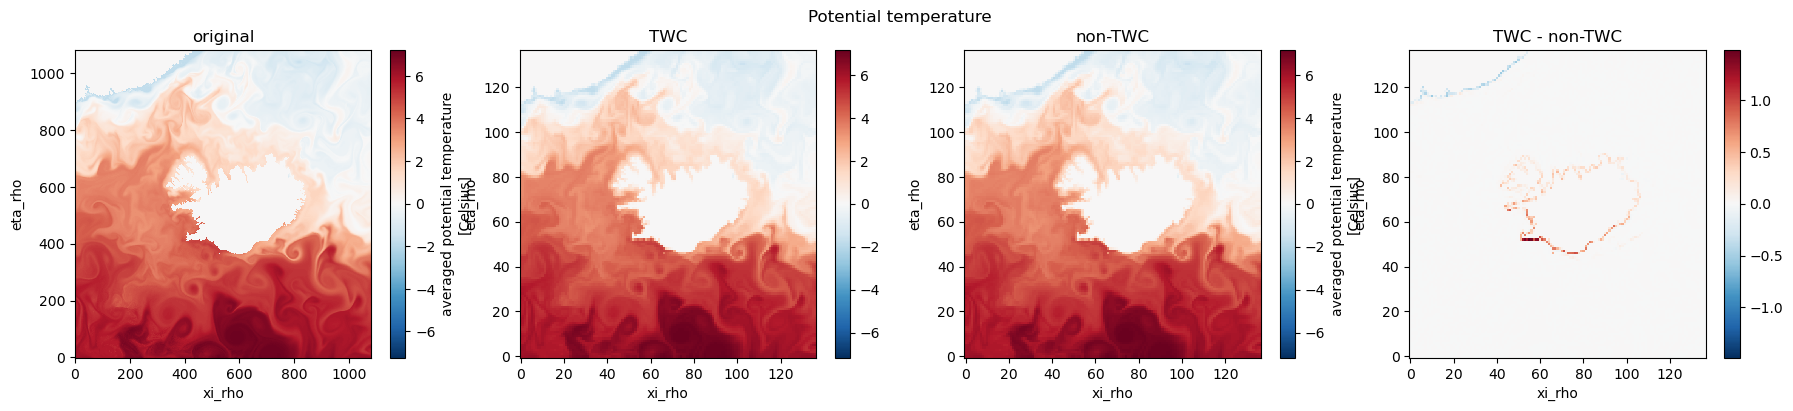

In [46]:
s_rho = -1
fig, axs = plt.subplots(1, 4, figsize=(22, 4))

ds["temp"].isel(s_rho=s_rho).plot(ax=axs[0])
axs[0].set_title("original")
temp_thickness_weighted_coarsened.isel(s_rho=s_rho).plot(ax=axs[1])
axs[1].set_title("TWC")
temp_coarsened.isel(s_rho=s_rho).plot(ax=axs[2])
axs[2].set_title("non-TWC")
(temp_thickness_weighted_coarsened - temp_coarsened).isel(s_rho=s_rho).plot(ax=axs[3])
axs[3].set_title("TWC - non-TWC")

fig.suptitle("Potential temperature")

The differences between TWC and non-TWC are generally small, but more apparent along the coastline where layer thicknesses become very small.

The same is true for velocities.

Text(0.5, 0.98, 'Zonal velocity')

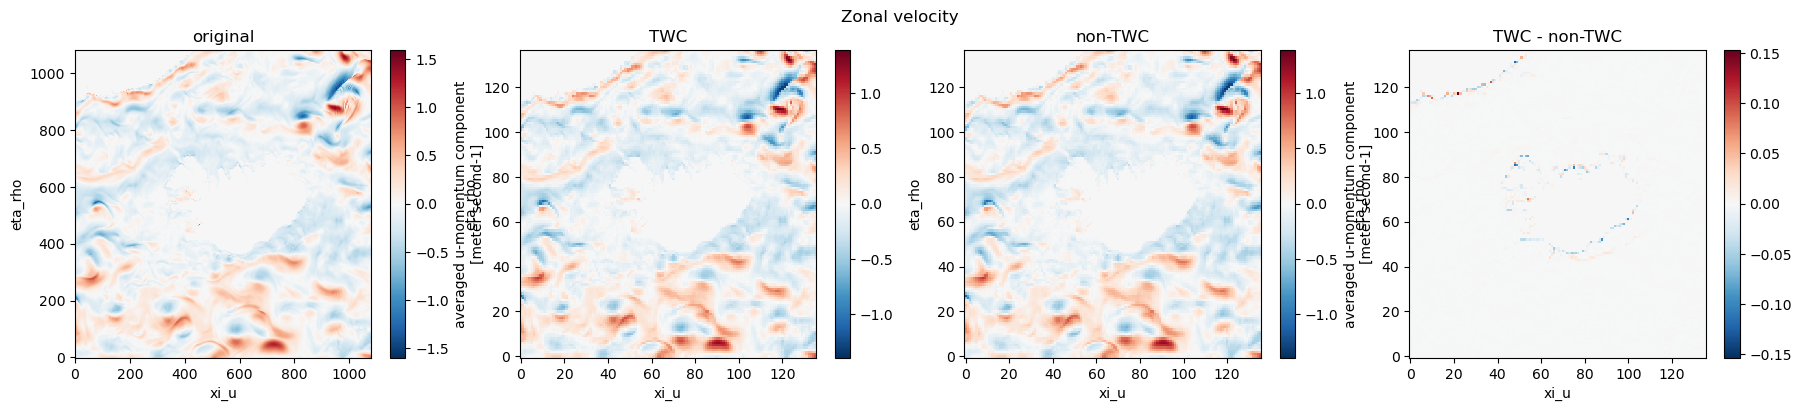

In [47]:
s_rho = -1
fig, axs = plt.subplots(1, 4, figsize=(22, 4))

ds["u"].isel(s_rho=s_rho).plot(ax=axs[0])
axs[0].set_title("original")
u_thickness_weighted_coarsened.isel(s_rho=s_rho).plot(ax=axs[1])
axs[1].set_title("TWC")
u_coarsened.isel(s_rho=s_rho).plot(ax=axs[2])
axs[2].set_title("non-TWC")
(u_thickness_weighted_coarsened - u_coarsened).isel(s_rho=s_rho).plot(ax=axs[3])
axs[3].set_title("TWC - non-TWC")

fig.suptitle("Zonal velocity")

### Some notes on thickness-weighted coarsening

If `thickness_weighted` is set to `True`, the `ROMSCoarsener` computes internally the following:
* tracer fields: ```theta_coarse = coarsen_t(theta * h_rho) / coarsen_t(h_rho)```
* u-fields: ```u_coarse = coarsen(u * h_u) / coarsen(h_u)```
* v-fields: ```v_coarse = coarsen(v * h_v) / coarsen(h_v)```

These computations, together with the design strategy of the `ROMSCoarsener` (see schematic at top of notebook) ensures that tracers and mass fluxes are conserved.

Note that fields like bathymetry, sea surface height, layer thickness should be coarsened with `thickness_weighted` set to `False`. This ensures volume conservation.